In [2]:
# importing tensorflow
import tensorflow as tf
print(tf.__version__)
 
# creating nodes in computation graph
node1 = tf.constant(3, dtype=tf.int32)
node2 = tf.constant(5, dtype=tf.int32)
node3 = tf.add(node1, node2)
 
print("sum of node1 and node2 is :", tf.get_static_value(node3))

2.16.2
sum of node1 and node2 is : 8


In [4]:
# Define a TensorFlow constant
constant_ts = tf.constant([1.0, 2.0, 3.0])

# Define a TensorFlow variable
# Tensors are multi-dimensional arrays with a uniform type (called a dtype ).
nums = [4.0, 5.0, 6.0]
variable_ts = tf.Variable(nums)
print("Initial variable Tensor:", variable_ts.numpy())

# Modify the variable
new_value = [7.0, 8.0, 9.0]
variable_ts.assign(new_value)

# Print the constant and variable tensors
print("Constant Tensor:", constant_ts.numpy())
print("Modified variable Tensor:", variable_ts.numpy())

Initial variable Tensor: [4. 5. 6.]
Constant Tensor: [1. 2. 3.]
Modified variable Tensor: [7. 8. 9.]


### Dataset Loading
The dataset consists of 20 features and we need to predict the price range in which phone lies

In [3]:
import pandas as pd

dataset = pd.read_csv('../datasets/train.csv') 
dataset.head(10) 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [13]:
dataset['price_range'].unique()

array([1, 2, 3, 0])

### Changing pandas dataframe to numpy array
X contains features and y will contain classes

In [14]:
X = dataset.iloc[:,:20].values
y = dataset.iloc[:,20:21].values

print(X)
print(y)
print(y.shape)

[[8.420e+02 0.000e+00 2.200e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [1.021e+03 1.000e+00 5.000e-01 ... 1.000e+00 1.000e+00 0.000e+00]
 [5.630e+02 1.000e+00 5.000e-01 ... 1.000e+00 1.000e+00 0.000e+00]
 ...
 [1.911e+03 0.000e+00 9.000e-01 ... 1.000e+00 1.000e+00 0.000e+00]
 [1.512e+03 0.000e+00 9.000e-01 ... 1.000e+00 1.000e+00 1.000e+00]
 [5.100e+02 1.000e+00 2.000e+00 ... 1.000e+00 1.000e+00 1.000e+00]]
[[1]
 [2]
 [2]
 ...
 [3]
 [0]
 [3]]
(2000, 1)


### Normalize the data

Normalization is a technique used to change the values of an array to a common scale, without distorting differences in the ranges of values

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

print(X)

[[-0.90259726 -0.9900495   0.83077942 ... -1.78686097 -1.00601811
   0.98609664]
 [-0.49513857  1.0100505  -1.2530642  ...  0.55964063  0.99401789
  -1.01409939]
 [-1.5376865   1.0100505  -1.2530642  ...  0.55964063  0.99401789
  -1.01409939]
 ...
 [ 1.53077336 -0.9900495  -0.76274805 ...  0.55964063  0.99401789
  -1.01409939]
 [ 0.62252745 -0.9900495  -0.76274805 ...  0.55964063  0.99401789
   0.98609664]
 [-1.65833069  1.0100505   0.58562134 ...  0.55964063  0.99401789
   0.98609664]]


### One hot encode the classes
To convert integer classes into binary values

In [16]:
print(y)

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

print(y)

[[1]
 [2]
 [2]
 ...
 [3]
 [0]
 [3]]
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


### Split data into training and testing data

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

### Build an ANNs Model with Keras, a high-level neural network framework based on tensorflow

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(4, activation="softmax"))


### Specify the loss function and the optimizer
It is done using compile function in keras

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training model
Training step is simple in keras. model.fit is used to train it.

In [18]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2730 - loss: 1.4683
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2977 - loss: 1.4069
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3159 - loss: 1.3639
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3652 - loss: 1.3152
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4100 - loss: 1.2647
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3966 - loss: 1.2251
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4862 - loss: 1.1479
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5386 - loss: 1.0687
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5723 - loss: 0.9868
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6222 - loss: 0.9101
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6666 - loss: 0.8218
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

### Check the model’s performance on test data
This step is inverse one hot encoding process <br>
We will get integer labels using this step

In [19]:
import numpy as np
y_pred = model.predict(X_test)

#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


### Predict on test data
It will take the test data as input and will return the prediction outputs as softmax

In [20]:

from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)

print('Accuracy is:', a*100)

Accuracy is: 89.5


### We can use test data as validation data and can check the accuracies after every epoch
This will give us an insight into overfitting at the time of training only and we can take steps before the completion of all epochs.

In [21]:
history= model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9979 - loss: 0.0396 - val_accuracy: 0.9000 - val_loss: 0.2636
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9966 - loss: 0.0432 - val_accuracy: 0.9000 - val_loss: 0.2537
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9982 - loss: 0.0426 - val_accuracy: 0.8950 - val_loss: 0.2734
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9954 - loss: 0.0429 - val_accuracy: 0.8950 - val_loss: 0.2571
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9949 - loss: 0.0434 - val_accuracy: 0.8950 - val_loss: 0.2676
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9984 - loss: 0.0396 - val_accuracy: 0.9000 - val_loss: 0.2659
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9975 - loss: 0.0383 - val_accuracy: 0.9000 - val_loss: 0.2631
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9988 - loss: 0.0395 - val_accuracy: 0.9050 -

### Visualize training and validation losses and accuracies

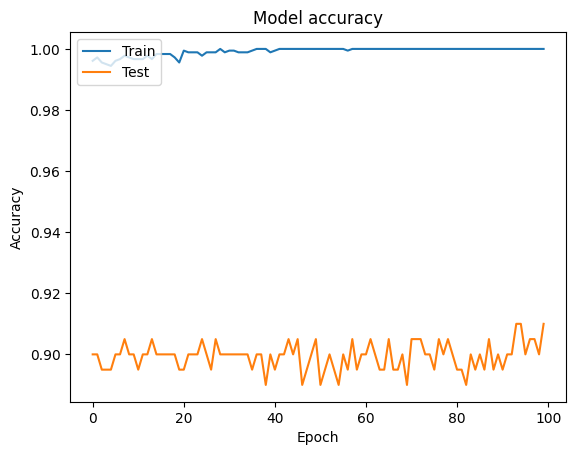

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

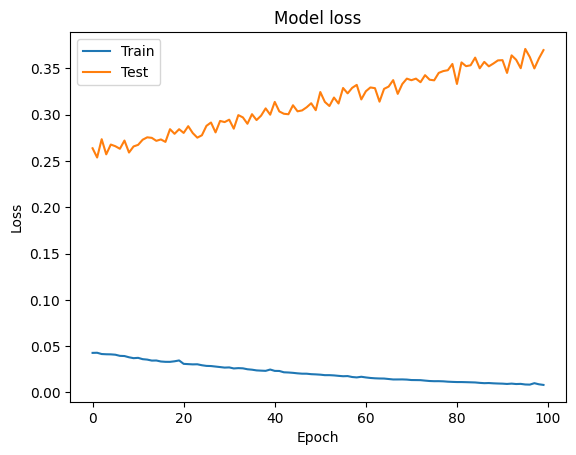

In [23]:

plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()